In [27]:
import LinAlg as LA
import numpy as np
import matplotlib.pyplot as plt
import DataIO as io
import Debug
import random

In [28]:

random_points = Debug.generate_random_points(10)

noisy_points = []
noise = 10

for point in random_points:
    point += LA.Vector(np.random.normal(0, noise), np.random.normal(0, noise), np.random.normal(0, noise))
    noisy_points.append(point)


theta, phi = random.uniform(0, np.pi), random.uniform(0, np.pi)
translation = LA.Vector(random.uniform(0,2000), random.uniform(0,2000), random.uniform(0,2000))  # Translation vector

transformation_matrix = Debug.create_transformation_matrix(theta, phi, translation)
print(transformation_matrix)

transformed_points = LA.transform_points(transformation_matrix, noisy_points)


for point in noisy_points:
    print(point)

print("\n\n")
for point in random_points:
    print(point)


[[   0.0609    0.9837    0.1693 1559.7897]
 [   0.9981   -0.0618    0.      948.8619]
 [   0.0105    0.1689   -0.9856 1735.996 ]
 [   0.        0.        0.        1.    ]]
Vector(106.95, 117.65, 28.95)
Vector(94.18, 147.28, 13.07)
Vector(90.95, 64.94, 151.30)
Vector(141.67, 91.74, 168.83)
Vector(21.37, 59.88, 1.85)
Vector(196.00, 38.48, 124.40)
Vector(161.66, 139.60, 179.47)
Vector(182.43, 81.75, 69.25)
Vector(160.66, 147.91, 204.24)
Vector(77.34, 8.32, 117.52)



Vector(97.45, 103.56, 19.93)
Vector(98.53, 126.94, 24.79)
Vector(102.72, 51.68, 155.18)
Vector(132.01, 95.81, 173.62)
Vector(16.34, 51.30, 3.96)
Vector(185.42, 39.60, 122.01)
Vector(160.48, 144.12, 184.48)
Vector(195.22, 82.69, 67.25)
Vector(145.94, 150.49, 198.68)
Vector(78.88, 17.59, 118.13)


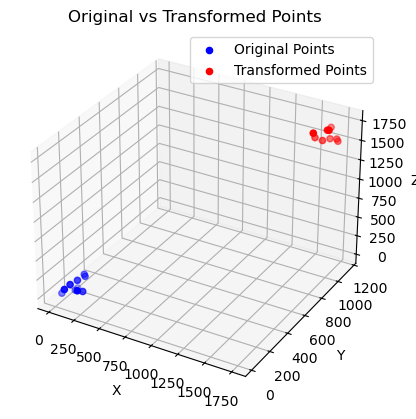

In [29]:
transformed_points = LA.transform_points(transformation_matrix, noisy_points)
Debug.plot_original_vs_transformed(random_points, transformed_points)

Find transformation from random_points to transformed_points

In [30]:

transformed_points_np = Debug.vectors_to_numpy(transformed_points)
random_points_np = Debug.vectors_to_numpy(random_points)

R, t = LA.point_cloud_registration(transformed_points_np, random_points_np)

print("Rotation matrix:", R)
print("Translation vector:", t, "\n")

print("Ground truth: \n", transformation_matrix)

Rotation matrix: [[ 0.01464193  0.99220931  0.12371864]
 [ 0.99980752 -0.01614414  0.01114833]
 [ 0.01305881  0.1235316  -0.99225471]]
Translation vector: [1572.82007039  945.32919702 1741.81196677] 

Ground truth: 
 [[   0.0609    0.9837    0.1693 1559.7897]
 [   0.9981   -0.0618    0.      948.8619]
 [   0.0105    0.1689   -0.9856 1735.996 ]
 [   0.        0.        0.        1.    ]]


Proposed point:  Vector(1679.46, 1041.31, 1736.10)
Proposed point:  Vector(1703.28, 1042.07, 1734.18)
Proposed point:  Vector(1644.80, 1048.93, 1595.56)
Proposed point:  Vector(1691.30, 1077.70, 1583.10)
Proposed point:  Vector(1624.45, 960.88, 1744.43)
Proposed point:  Vector(1629.92, 1131.43, 1628.06)
Proposed point:  Vector(1740.99, 1105.51, 1578.66)
Proposed point:  Vector(1666.04, 1139.93, 1687.85)
Proposed point:  Vector(1748.85, 1091.03, 1565.16)
Proposed point:  Vector(1606.04, 1025.22, 1627.80)
Truth point:  Vector(1686.93, 1048.34, 1728.45)
Truth point:  Vector(1712.61, 1033.77, 1748.98)
Truth point:  Vector(1654.82, 1035.62, 1598.80)
Truth point:  Vector(1687.24, 1084.59, 1586.58)
Truth point:  Vector(1620.31, 966.49, 1744.52)
Truth point:  Vector(1630.63, 1142.11, 1621.94)
Truth point:  Vector(1737.34, 1101.59, 1584.40)
Truth point:  Vector(1663.04, 1125.89, 1683.47)
Truth point:  Vector(1749.64, 1100.07, 1561.37)
Truth point:  Vector(1592.58, 1025.54, 1622.39)


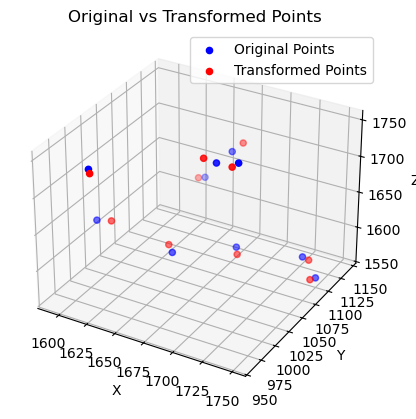

In [31]:
Proposed_transformation_matrix = LA.Frame(R, t)
Proposed_transformed_points = LA.transform_points(Proposed_transformation_matrix, random_points)

for point in Proposed_transformed_points:
    print("Proposed point: " ,point)

for point in transformed_points:
    print("Truth point: ", point)


Debug.plot_original_vs_transformed(transformed_points, Proposed_transformed_points)  